# Plot Published Data Vectors

Plotting the public kv450 data vectors.  This sacc file was created for the Firecrown 3x2 pt. tutorial and plotting is adapted from that notebook: https://github.com/LSSTDESC/firecrown/blob/master/examples/des_y1_3x2pt/plot_des_data_model.ipynb. 

In [1]:
import numpy as np
import sacc
import matplotlib.pyplot as plt

In [2]:
n_src = 5

In [5]:
data_dir = '/global/cscratch1/sd/elp25/txpipe-reanalysis/kv450/notebooks/'

In [7]:
kv_data = sacc.Sacc.load_fits(data_dir+'kv450_cosmicshear_sacc_data.fits')

## Plot the Redshift Distribution

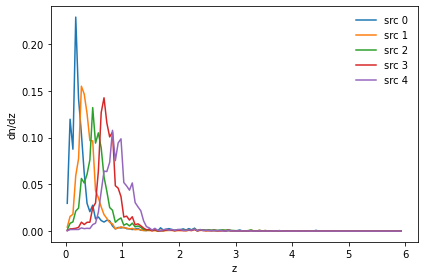

In [14]:
kv_data.get_tracer('src%d' % i)

for i in range(n_src):
    tr = kv_data.get_tracer('src%d' % i)
    plt.plot(tr.z, tr.nz/np.sum(tr.nz), label='src %d' % i)

plt.xlabel('z')
plt.ylabel('dn/dz')
plt.legend(loc=1, frameon=False)

plt.tight_layout()

## Plot the Covariance Matrix

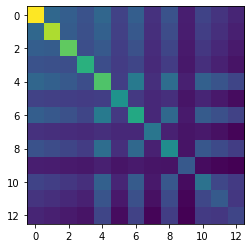

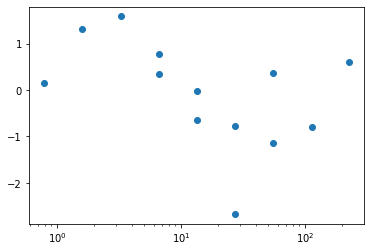

In [16]:
#fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 8))
from matplotlib.colors import LogNorm

i = 0
j = 0

theta, xip, cov = kv_data.get_theta_xi(
    'galaxy_shear_xi_plus', 
    'src%d' % i, 
    'src%d' % j,
    return_cov=True,
)
plt.imshow(cov,norm=LogNorm())
plt.show()
plt.semilogx(theta, theta * xip * 1e4, 'o')
plt.show()

## Data Vectors

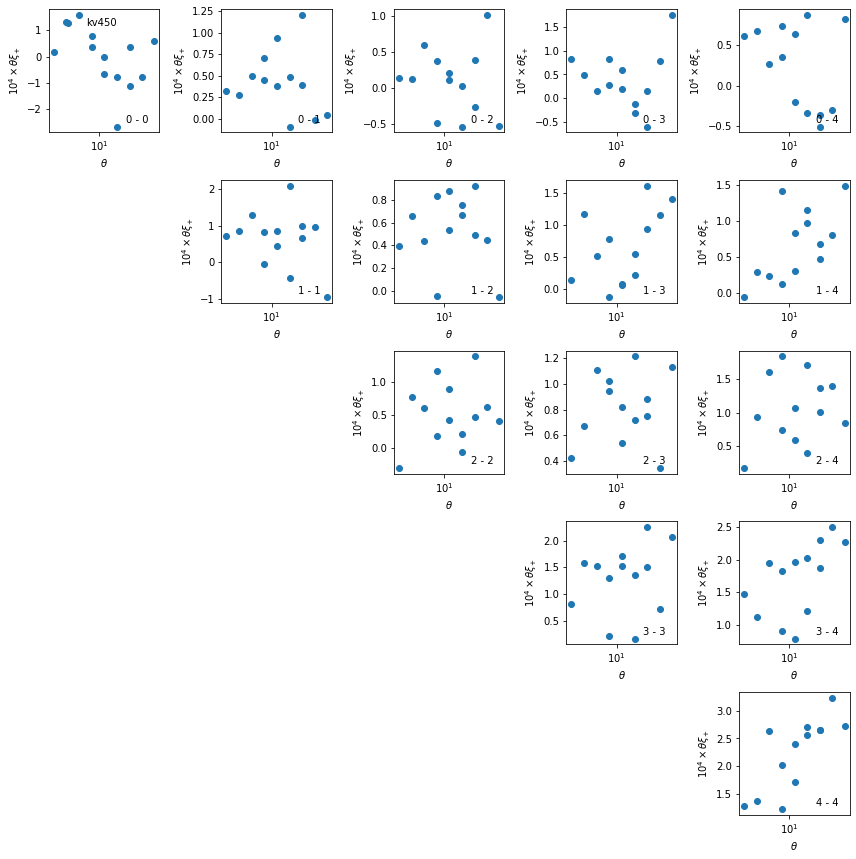

In [23]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))

loc = 0
for i in range(n_src):
    for j in range(n_src):
        # skip extra plots
        if i > j:
            axs[i, j].axis('off')
            continue
        
        ax = axs[i, j]
        
        # des
        theta, xip = kv_data.get_theta_xi(
             'galaxy_shear_xi_plus', 
            'src%d' % i, 
            'src%d' % j)   
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * theta
        
        ax.semilogx(
            theta, 
            fac * xip, 
            'o',
            label='kv450')
        
        if i == 0 and j == 0:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$10^{4}\times\theta\xi_{+}$')
            
plt.tight_layout()

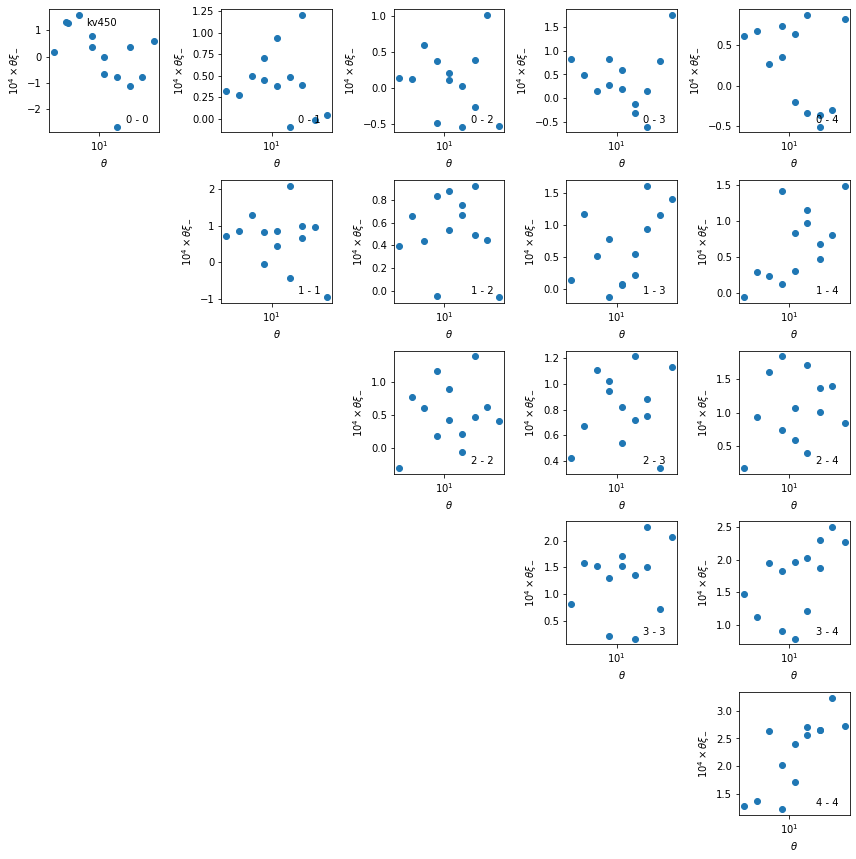

In [22]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(12, 12))

loc = 0
for i in range(n_src):
    for j in range(n_src):
        # skip extra plots
        if i > j:
            axs[i, j].axis('off')
            continue
        
        ax = axs[i, j]
        
        # des
        theta, xip = kv_data.get_theta_xi(
             'galaxy_shear_xi_plus', 
            'src%d' % i, 
            'src%d' % j)   
        
        # this is a factor of 10^4 x theta to take out the dynamic range
        fac = 1e4 * theta
        
        ax.semilogx(
            theta, 
            fac * xip, 
            'o',
            label='kv450')
        
        if i == 0 and j == 0:
            ax.legend(loc=2, frameon=False)
        
        ax.text(
            0.9, 0.1, '%d - %d' % (i, j), 
            horizontalalignment='right',
            verticalalignment='center', 
            transform=ax.transAxes)

        ax.set_xlabel(r'$\theta$')
        ax.set_ylabel(r'$10^{4}\times\theta\xi_{-}$')
            
plt.tight_layout()